## 14.03.2022

# <center> Авторегрессионные модели прогнозирования </center>

## 2. Модели класса ARMA

### 2.1. ARMA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('C:/Users/mag/lynx.csv', index_col="Year", parse_dates=True)
df.head()

,Annual number of lynx trapped
Year,
1821-01-01,269
1822-01-01,321
1823-01-01,585
1824-01-01,871
1825-01-01,1475


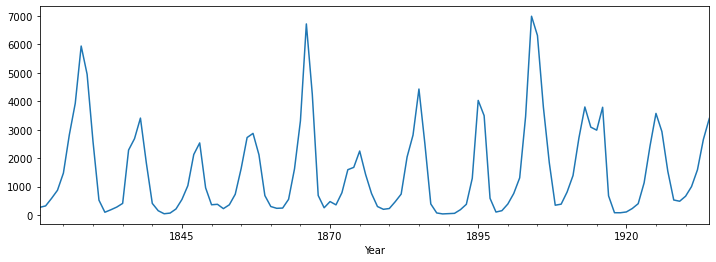

In [13]:
df['Annual number of lynx trapped'].plot(figsize = (12, 4))
plt.show()

In [50]:
data = pd.read_csv('C:/Users/mag/lynx.csv')

In [51]:
data.columns = ['year', 'y']

In [52]:
data['y1'] = data ['y'].shift(1)
data['y2'] = data ['y'].shift(2)

In [33]:
from scipy import optimize

In [55]:
data = data.dropna()

In [59]:
np.mean((data['y'] - 2 * data['y1'] - 3 * data['y2'] + 10)**2)

82277145.88392857

In [61]:
data

,year,y,y1,y2
2,1823,585,321.0,269.0
3,1824,871,585.0,321.0
4,1825,1475,871.0,585.0
5,1826,2821,1475.0,871.0
6,1827,3928,2821.0,1475.0
...,...,...,...,...
109,1930,662,485.0,529.0
110,1931,1000,662.0,485.0
111,1932,1590,1000.0,662.0
112,1933,2657,1590.0,1000.0


In [60]:
df['Annual number of lynx trapped'].shift(1)

Year
1821-01-01       NaN
1822-01-01     269.0
1823-01-01     321.0
1824-01-01     585.0
1825-01-01     871.0
               ...  
1930-01-01     485.0
1931-01-01     662.0
1932-01-01    1000.0
1933-01-01    1590.0
1934-01-01    2657.0
Name: Annual number of lynx trapped, Length: 114, dtype: float64

In [100]:
data['const'] = 1

<ipython-input-100-33ac47f10509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['const'] = 1


def mse1 (data, alpha, phi1, phi2):
    return np.mean((data['y'] - np.dot(data.loc[:, 'y1':].values, [phi1,phi2,alpha]) * data['y1'] - phi1 * data['y2'] -alpha)**2)

In [101]:
def mse (phi1, phi2, alpha):
    return np.mean((data['y'] - phi1 * data['y1'] - phi2 * data['y2'] -alpha)**2)

In [102]:
from scipy import optimize

In [103]:
res = optimize.minimize(lambda x: mse(x[0], x[1], x[2]),(1,1,1))
res

      fun: 776676.8542898056
 hess_inv: array([[ 3.93947280e-07, -3.10561318e-07, -8.95818072e-05],
       [-3.10561318e-07,  3.96214215e-07, -8.25369847e-05],
       [-8.95818072e-05, -8.25369847e-05,  5.02636162e-01]])
      jac: array([3.609375 , 3.6328125, 0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 231
      nit: 6
     njev: 55
   status: 2
  success: False
        x: array([ 1.15242199e+00, -6.06229527e-01,  7.10109918e+02])

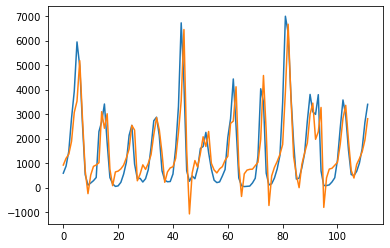

In [104]:
plt.plot(data['y'].values)
plt.plot(np.dot(data.loc[:, 'y1':], res.x))

In [109]:
f = np.dot(data.loc[:, 'y1':], res.x)

In [112]:
f1 = data['y'] - f

In [114]:
f1 = pd.DataFrame(f1)
f1 = f1.reset_index()

In [115]:
f1

,index,y
0,2,-331.961634
1,3,-318.677103
2,4,115.774803
3,5,939.093566
4,6,861.096203
...,...,...
107,109,-286.339163
108,110,-178.991954
109,111,128.792040
110,112,720.768647


In [117]:
f1 = f1.drop('index', axis = 1)

In [118]:
f1

,y
0,-331.961634
1,-318.677103
2,115.774803
3,939.093566
4,861.096203
...,...
107,-286.339163
108,-178.991954
109,128.792040
110,720.768647


In [119]:
f1['y1'] = f1 ['y'].shift(1)
f1['y2'] = f1 ['y'].shift(2)

In [120]:
f1

,y,y1,y2
0,-331.961634,NaN,NaN
1,-318.677103,-331.961634,NaN
2,115.774803,-318.677103,-331.961634
3,939.093566,115.774803,-318.677103
4,861.096203,939.093566,115.774803
...,...,...,...
107,-286.339163,97.033633,-173.098853
108,-178.991954,-286.339163,97.033633
109,128.792040,-178.991954,-286.339163
110,720.768647,128.792040,-178.991954


In [121]:
f2 = f1.dropna()

In [177]:
def mse1 (theta1, theta2, beta):
    return np.mean((-theta1*f2['y1'] - theta2*f2['y2'] - beta + f2['y'])**2)

In [179]:
res1 = optimize.minimize(lambda x: mse1(x[0], x[1], x[2]),(1,1,1))
res1

      fun: 771098.895742362
 hess_inv: array([[ 1.00199333e-05, -1.04428418e-05, -7.67496814e-05],
       [-1.04428418e-05,  1.09898241e-05,  7.96648557e-05],
       [-7.67496814e-05,  7.96648557e-05,  5.91824910e-04]])
      jac: array([0.046875 , 0.03125  , 0.0234375])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 300
      nit: 13
     njev: 72
   status: 2
  success: False
        x: array([-0.02090929, -0.14952244,  4.08487799])

In [180]:
f2['const'] = 1

<ipython-input-180-051ddf401e68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['const'] = 1


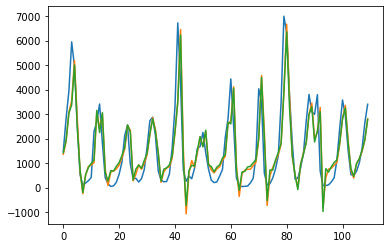

In [187]:
plt.plot(data['y'].values[2:])
plt.plot(np.dot(data.loc[:, 'y1':], res.x)[2:])
plt.plot(np.dot(f2.loc[:, 'y1':], res1.x) + np.dot(data.loc[:, 'y1':], res.x)[2:])